# Principal Component Analysis

- PCA is a dimensionality reduction technique
- It is used for multiple purposes:
    - reducing the number of features for system performance (e.g 500 features that are causing slowness in the system. reduce to 300 dimensions)
    - visualization: we cannot visualize 6 features in hyper-dimensional space. Instead, we can reduce the dimensions to 2 and plot to get an estimate of the clusters and their distribution 
- PCA/dim reduction can suffer from multiple issues:
    - increased computation complexity (reduce from very large to very small)
    - loss of information. When reducing the dimensions, there's a loss of information just like an image compression (reduce from very large to very small)
    - it may reduce overfitting by reducing variance and thus the complexity of the data



![PCA](https://www.sc-best-practices.org/_images/dimensionality_reduction.jpeg)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

C:\Users\chand\AppData\Local\Temp\ipykernel_15512\3883891873.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
cancer_data = load_breast_cancer()
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
SC = StandardScaler()

X =SC.fit_transform(df)
X[:10]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [5]:
np.shape(X)

(569, 30)

In [6]:
# specify PCA components - reducing 30 dimensions to 2
pca_model = PCA(n_components=2)

In [7]:
X_PCA = pca_model.fit_transform(X)

In [8]:
print('shape before PCA:', np.shape(X), '\nshape after PCA:', np.shape(X_PCA))

shape before PCA: (569, 30) 
shape after PCA: (569, 2)


In [9]:
X_PCA[:,0] # First Principle component

array([ 9.19283683,  2.3878018 ,  5.73389628,  7.1229532 ,  3.93530207,
        2.38024715,  2.23888331,  2.1432985 ,  3.17492429,  6.35174679,
       -0.81041377,  2.65110048,  8.18503446,  0.34212591,  4.34237919,
        4.07565618,  0.23005502,  4.41801092,  4.94870355, -1.23706336,
       -1.57816123, -3.55733637,  4.73321079,  4.20852421,  4.94963207,
        7.09856285,  3.5102626 ,  3.06405389,  4.00726414,  1.71530973,
        6.05944551,  2.9022361 ,  4.55478269,  4.99060272,  2.98534079,
        2.76636916,  1.29619877, -3.7493134 , -0.9980689 ,  0.76526412,
       -2.15095347, -0.09333139,  9.08799968,  0.99045377, -0.29354655,
        5.38094041, -4.58193667,  1.70000689, -2.13644528, -1.567479  ,
       -3.54290556, -3.15781405, -3.45048854,  3.30255095, -0.67461929,
       -2.85815844,  4.64873887,  2.17686288, -3.72145899, -4.13596294,
       -2.38583566, -2.57888325,  4.75911215, -2.31413225,  1.69160792,
        1.81230541, -2.78592476, -3.51864834,  4.33000265, -3.26

Text(0, 0.5, 'PCA2')

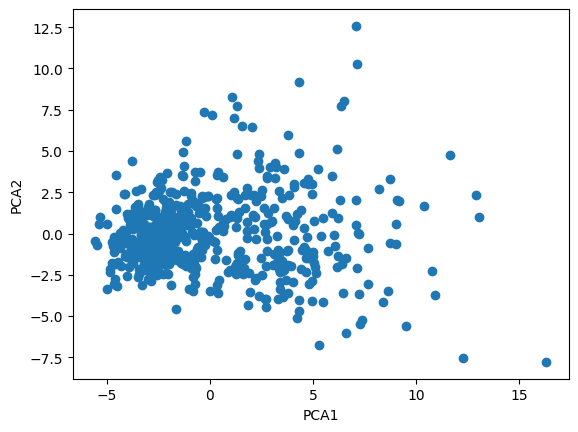

In [10]:
plt.scatter(X_PCA[:,0], X_PCA[:,1])
plt.xlabel('PCA1')
plt.ylabel('PCA2')

### Explained Variance Ratio
- an important attribute for PCA that provides information about the amount of variance in the original data tht is explained by PCA
- When you perform PCA, each component is ordered in their ability to explain the variance in the data
- The sum of all values in the explained variance ratio should equal to 1. e.g. 30 PCAs = 1 

In [11]:
pca_full = PCA() # by default use 30 PCAs (vs 2 PCAs in our previous example)
pca_full.fit(X)

PCA()

In [12]:
np.shape(pca_full.explained_variance_ratio_)

(30,)

In [13]:
pca_full.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [14]:
np.sum(pca_full.explained_variance_ratio_)

1.0

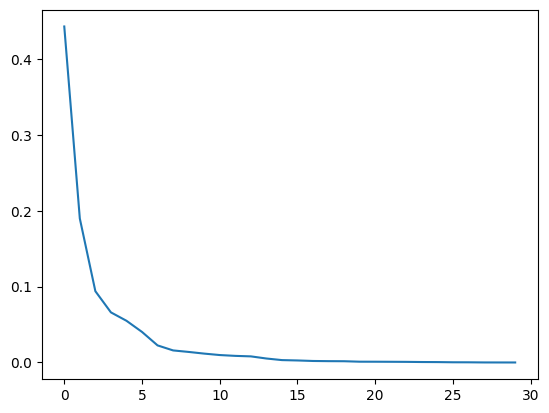

In [15]:
plt.plot(pca_full.explained_variance_ratio_)

In [16]:
# get the cumulative sum of evr
np.cumsum(pca_full.explained_variance_ratio_)

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

([<matplotlib.axis.XTick at 0x18b23dd1b50>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30')])

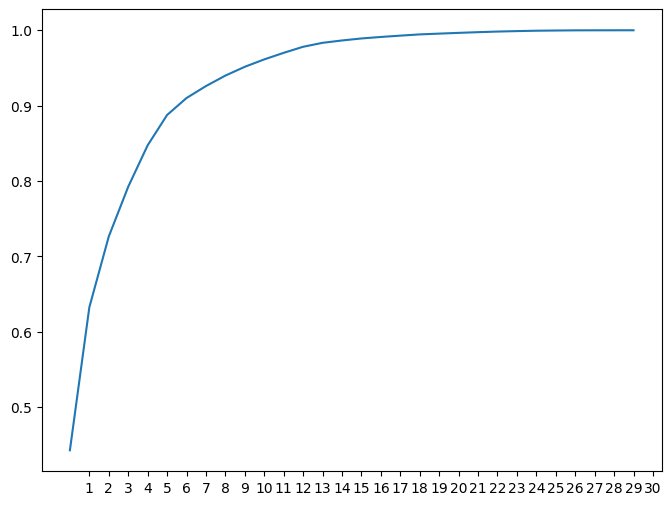

In [17]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xticks(range(1,31))

- PCA1 explains 44% of the variance of my data
- PCA2 explains 63% of = = = 
- If we need to reduce dimensionality (for system performance for example), we can pick PCA = 9, as it will explain 94% of the variance in the data

## PCA Loadings

- PCA loadings help us understand the impact of each PCA on the reduced features
- It represents the correlation of each feature to the PCA itself

In [18]:
# example for our 2 PCAs
Two_PCA_Loadings = pca_model.components_

print('Loadings Factors of Principle Component 1\n', Two_PCA_Loadings[0])
print('Loadings Factors of Principle Component 2\n', Two_PCA_Loadings[1])

Loadings Factors of Principle Component 1
 [0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]
Loadings Factors of Principle Component 2
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


In [19]:
loadings_df = pd.DataFrame(Two_PCA_Loadings, columns=df.columns)
loadings_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
